In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("true_car_listings.csv")

In [3]:
df.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [4]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [5]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


<AxesSubplot:>

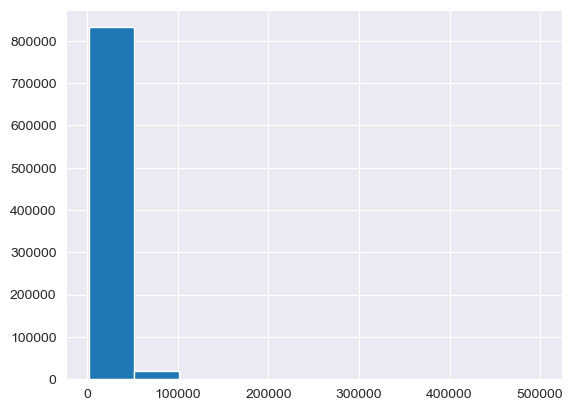

In [6]:
df.Price.hist()

<AxesSubplot:>

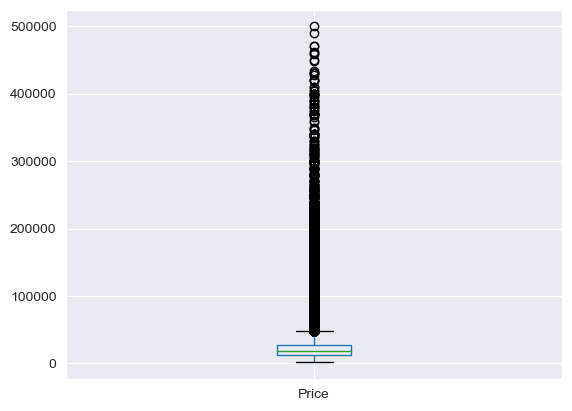

In [7]:
df.boxplot(column='Price')

<AxesSubplot:>

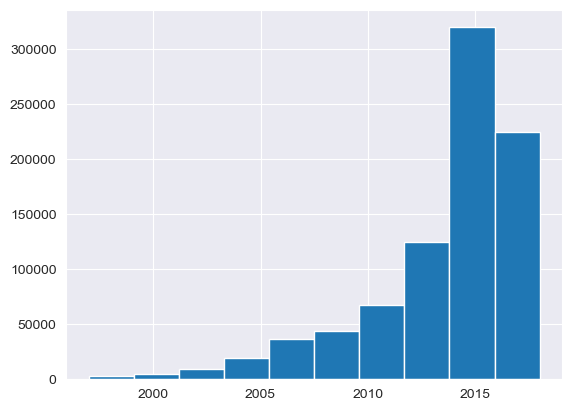

In [8]:
df.Year.hist()

<AxesSubplot:>

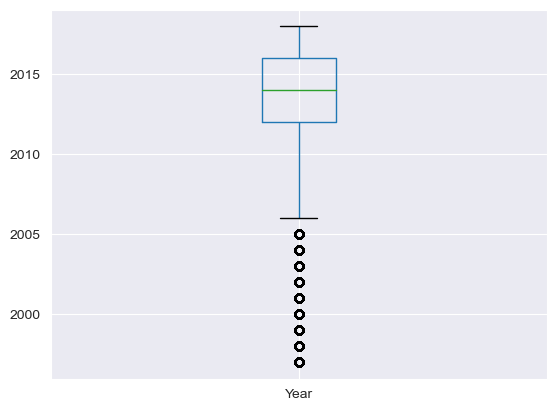

In [9]:
df.boxplot(column="Year")

<AxesSubplot:>

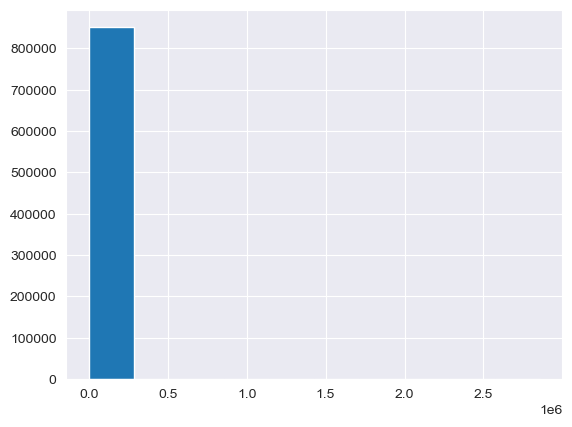

In [10]:
df.Mileage.hist()

<AxesSubplot:>

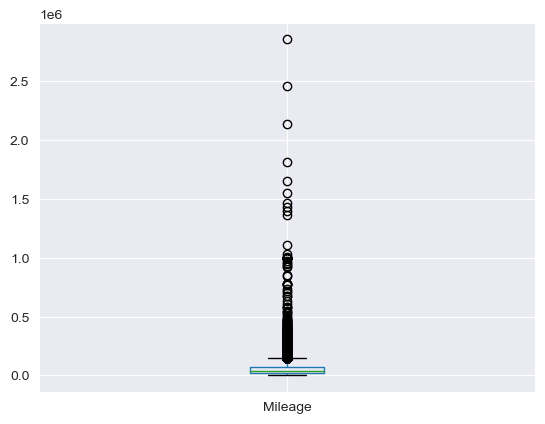

In [11]:
df.boxplot(column="Mileage")

In [12]:
df.corr()

,Price,Year,Mileage
Price,1.000000,0.401250,-0.421237
Year,0.401250,1.000000,-0.764849
Mileage,-0.421237,-0.764849,1.000000


<AxesSubplot:>

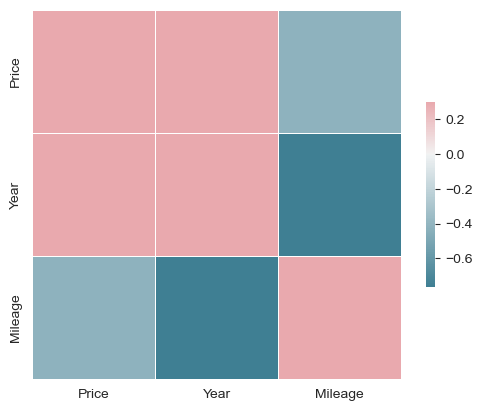

In [13]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[["Price", "Year", "Mileage"]].corr(), cmap=cmap, vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5})

In [14]:
enc = OneHotEncoder(drop='first', sparse=False)
df_cat = df[['City', 'State', 'Make', 'Model']]
oh = enc.fit_transform(df_cat)

In [15]:
print(oh)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
cat_vars = ['City', 'State', 'Make', 'Model']
enc_feature_names = enc.get_feature_names_out(cat_vars)

In [17]:
print(enc_feature_names)

['City_ALEXANDRIA' 'City_AURORA' 'City_AUSTIN' ... 'Model_xD5dr'
 'Model_xDAutomatic' 'Model_xDManual']


In [18]:
enc_df = pd.DataFrame(oh, columns=enc_feature_names, dtype='float16')

In [21]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [22]:
df_clone = df.drop(columns=['City', 'State', 'Make', 'Model'], axis=1)
df_clone.head()

,Price,Year,Mileage,Vin
0,8995,2014,35725,19VDE2E53EE000083
1,10888,2013,19606,19VDE1F52DE012636
2,8995,2013,48851,19VDE2E52DE000025
3,10999,2014,39922,19VDE1F71EE003817
4,14799,2016,22142,19UDE2F32GA001284


In [23]:
new_df = df_clone.join(enc_df)

In [25]:
new_df.head(50)

,Price,Year,Mileage,Vin,City_ALEXANDRIA,City_AURORA,City_AUSTIN,City_AVON,City_Abbeville,City_Aberdeen,...,Model_xA4dr,Model_xB5dr,Model_xB686,Model_xBAutomatic,Model_xBBase,Model_xBManual,Model_xD,Model_xD5dr,Model_xDAutomatic,Model_xDManual
0,8995,2014,35725,19VDE2E53EE000083,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10888,2013,19606,19VDE1F52DE012636,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8995,2013,48851,19VDE2E52DE000025,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10999,2014,39922,19VDE1F71EE003817,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14799,2016,22142,19UDE2F32GA001284,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7989,2012,105246,JH4CU2F83CC019895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,14490,2014,34032,JH4CU2F84EC002686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,13995,2013,32384,JH4CU2F64DC006203,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10495,2013,57596,19VDE2E50DE000234,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9995,2013,63887,19VDE1F50DE010450,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
